In [36]:
from methods import *
from pathlib import Path
from matplotlib.pyplot import style
style.use('seaborn')
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2 as cv
import torch
import torch.nn as nn
import seaborn as sns

plt.rcParams["axes.grid"] = False
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['image.cmap'] = "gray"

In [37]:
data_path = (Path.cwd() / 'data' / 'Slice44-AllChannels.nii').as_posix()

In [38]:
img_nib = nib.load(data_path)

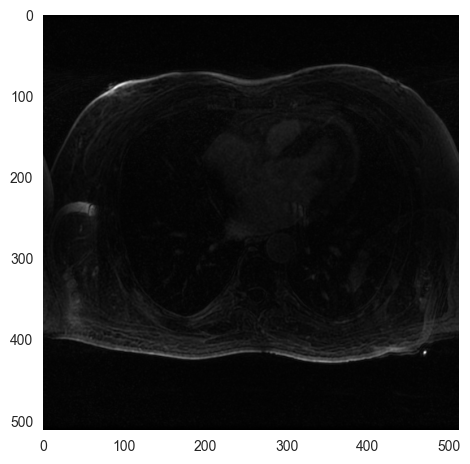

In [57]:
prev_img = combine_images(img_nib.dataobj)
prev_img = np.flip(prev_img, [0,1])
plt.imshow(prev_img)
plt.show()

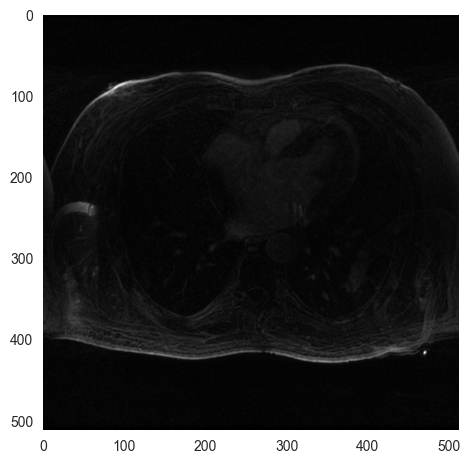

In [40]:
prev_img[prev_img < 50] = 0
plt.imshow(prev_img, cmap='gray')
plt.show()

In [41]:

prev_img = combine_images(img_nib.dataobj)

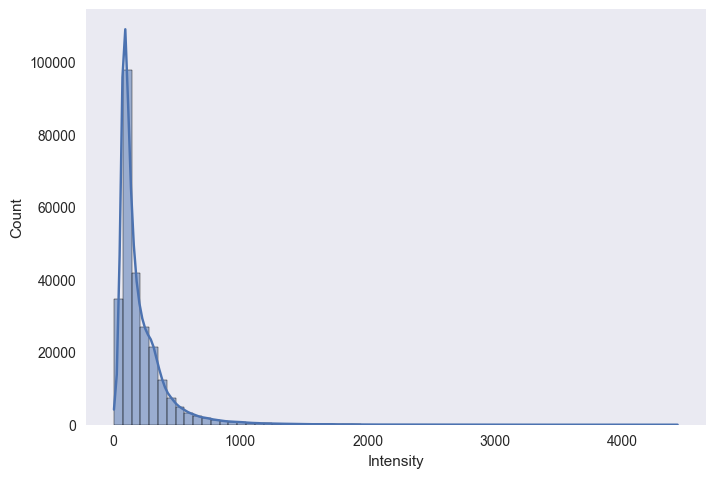

In [42]:
fig, ax = plt.subplots()
sns.histplot(prev_img.flatten(), bins=64, kde='True')
ax.set_xlabel("Intensity")
fig.savefig('output.png')
plt.show()

1132.8174666142695
1140.2268363846608


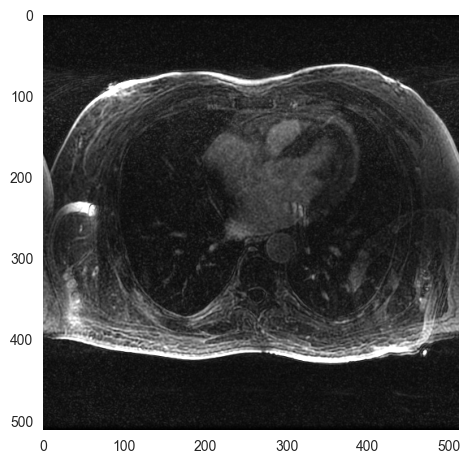

In [60]:
test = prev_img.copy()
print(np.quantile(test,0.99))
test = auto_contrast(test, 0.99)
plt.imshow(test)
plt.show()

<AxesSubplot:ylabel='Count'>

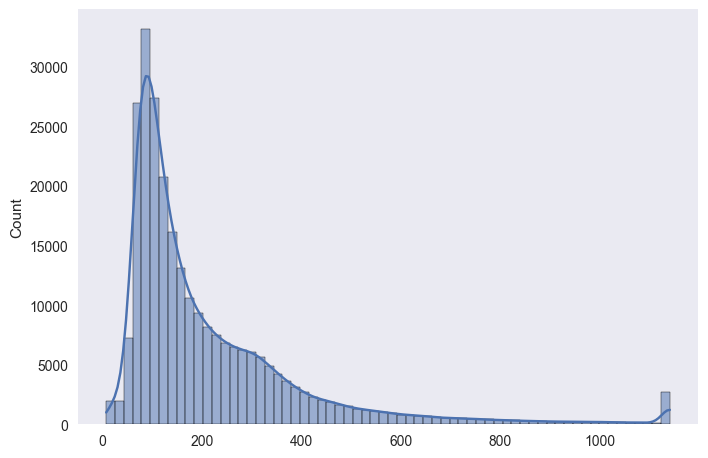

In [61]:
sns.histplot(test.flatten(), bins=64, kde='True')

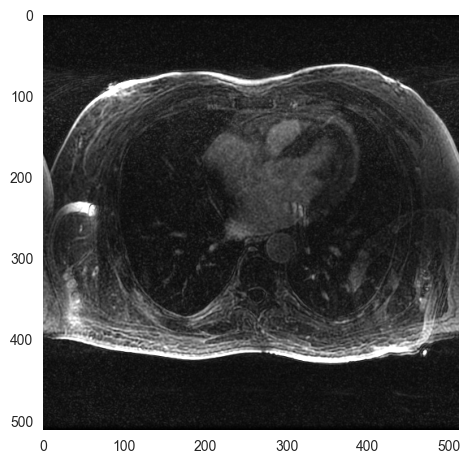

In [62]:
test2 = test.copy()
test2 = (test2-np.mean(test2))/np.std(test2)
plt.imshow(test2)
plt.show()

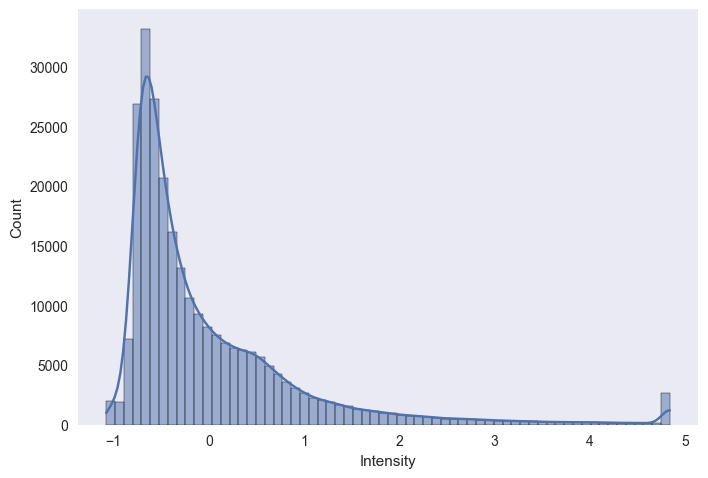

In [64]:
fig, ax = plt.subplots()
sns.histplot(test2.flatten(), bins=64, kde='True')
ax.set_xlabel("Intensity")
fig.savefig('output.png')
plt.show()

3545.5125002696486


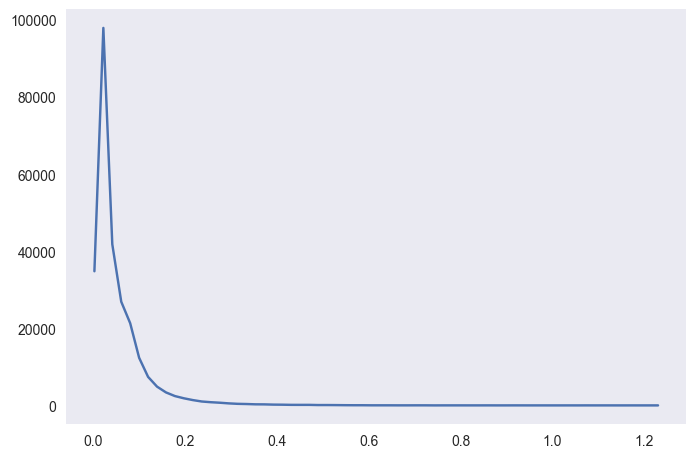

In [49]:
test3 = prev_img.copy()
hist,bins = np.histogram(test3.flatten(), bins=64)
limit = np.quantile(bins, 0.8)
print(limit)
test3/=limit
hist,bins = np.histogram(test3.flatten(), bins=64)
plt.plot(bins[:-1], hist)
plt.show()

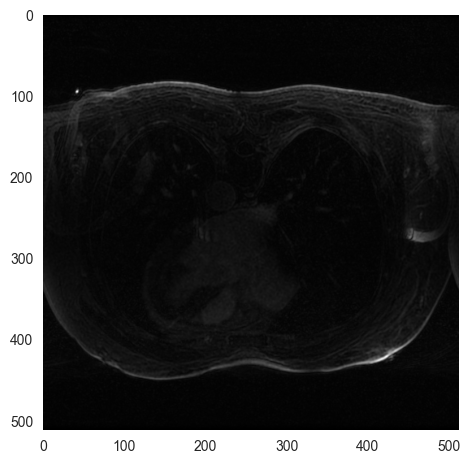

In [50]:
plt.imshow(test3, cmap='gray')
plt.show()

In [51]:
denoised = cv.fastNlMeansDenoising(noise, None)

NameError: name 'noise' is not defined

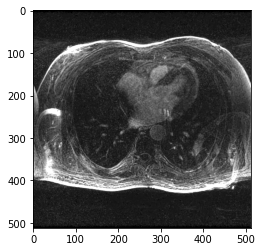

In [ ]:
plt.imshow(denoised,cmap='gray')
plt.show()